In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
header_file = 'Data/catalog_NGC1960_header.txt'

with open(header_file, 'r') as f:
    lines = f.readlines()

# Extract the 2nd column from each line (the actual column name)
column_names = [re.split(r'\s+', line.strip())[1] for line in lines]

NGC_1960_data=pd.read_csv("Data/catalog_NGC1960.dat",sep=r'\s+',names=column_names)

display(NGC_1960_data)

,ID,X,Y,RA,DEC,U,eU,B,eB,V,...,eH,K,eK,p,ep,mu_x,e_mu_x,mu_y,e_mu_y,Prob
0,1,672.691,407.299,05:36:23.05,+34:10:32.8,8.276,9.999,9.106,0.067,8.291,...,0.019,8.942,0.017,0.672,0.056,-0.439,0.101,-3.398,0.075,0.91
1,2,519.150,525.390,05:36:15.79,+34:08:36.9,8.219,9.999,8.879,9.999,8.880,...,0.017,8.846,0.017,0.514,0.068,-0.695,0.107,-3.586,0.086,0.66
2,3,142.860,138.930,05:36:39.24,+34:03:50.1,8.482,9.999,9.082,9.999,9.060,...,0.021,8.957,0.018,0.789,0.062,0.104,0.107,-3.864,0.075,0.74
3,4,692.598,261.029,05:36:31.99,+34:10:47.2,8.472,0.006,9.100,9.999,9.090,...,0.019,9.108,0.015,0.756,0.050,0.299,0.100,-3.491,0.075,0.87
4,5,-187.535,1042.736,05:35:44.08,+33:59:44.4,99.999,9.999,9.105,0.021,9.099,...,0.020,9.030,0.017,1.066,0.056,1.278,0.112,-3.183,0.083,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,3958,151.295,829.527,05:35:57.13,+34:03:59.3,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,0.071,0.703,-7.079,1.604,2.209,1.154,0.00
3958,3959,866.494,809.277,05:35:58.56,+34:13:01.1,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,-0.286,0.760,-1.088,1.690,-2.746,1.362,0.40
3959,3960,184.880,805.751,05:35:58.58,+34:04:24.7,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,-0.152,0.712,3.151,1.626,-1.298,1.115,0.03
3960,3961,681.791,817.996,05:35:57.98,+34:10:41.2,99.999,9.999,99.999,9.999,99.999,...,9.999,99.999,9.999,-1.668,0.929,0.721,1.724,-4.789,1.142,0.29


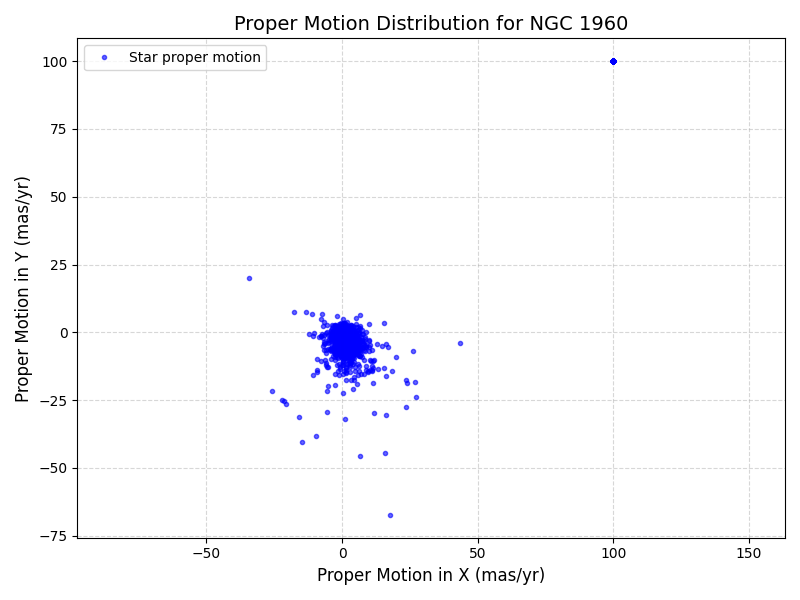

In [85]:
plt.figure(figsize=(8, 6))  # Optional: larger figure size
plt.plot(
    NGC_1960_data.mu_x, 
    NGC_1960_data.mu_y, 
    'bo', 
    markersize=3,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion'
)

# Add labels and title
plt.xlabel('Proper Motion in X (mas/yr)', fontsize=12)
plt.ylabel('Proper Motion in Y (mas/yr)', fontsize=12)
plt.title('Proper Motion Distribution for NGC 1960', fontsize=14)

plt.axis('equal')
# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Data from the paper

-4 to -3 in y and -0.6 to +0.6 in x: from visual inspection we can filter out to estimate cluster members

In [94]:
Df_member=NGC_1960_data[(NGC_1960_data.mu_x>=-0.6) & (NGC_1960_data.mu_x<=0.6) & (NGC_1960_data.mu_y>=-4) & (NGC_1960_data.mu_y<=-3)]

In [103]:
Df_member # Clustem mebmers data

,ID,X,Y,RA,DEC,U,eU,B,eB,V,...,eK,p,ep,mu_x,e_mu_x,mu_y,e_mu_y,Prob,RA_deg,DEC_deg
0,1,672.691,407.299,05:36:23.05,+34:10:32.8,8.276,9.999,9.106,0.067,8.291,...,0.017,0.672,0.056,-0.439,0.101,-3.398,0.075,0.91,84.096042,34.175778
2,3,142.860,138.930,05:36:39.24,+34:03:50.1,8.482,9.999,9.082,9.999,9.060,...,0.018,0.789,0.062,0.104,0.107,-3.864,0.075,0.74,84.163500,34.063917
3,4,692.598,261.029,05:36:31.99,+34:10:47.2,8.472,0.006,9.100,9.999,9.090,...,0.015,0.756,0.050,0.299,0.100,-3.491,0.075,0.87,84.133292,34.179778
5,6,473.710,413.770,05:36:22.59,+34:08:02.0,8.488,9.999,9.148,9.999,9.150,...,0.018,0.782,0.065,-0.151,0.131,-3.451,0.097,0.94,84.094125,34.133889
6,7,797.690,92.870,05:36:42.30,+34:12:06.0,8.610,9.999,9.147,9.999,9.140,...,0.019,0.764,0.058,0.159,0.107,-3.519,0.081,0.92,84.176250,34.201667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3884,742.095,691.481,05:36:05.72,+34:11:26.5,99.999,9.999,99.999,9.999,20.581,...,0.148,1.318,0.440,-0.010,0.902,-3.176,0.671,0.69,84.023833,34.190694
3901,3902,1184.152,23.555,05:36:46.69,+34:16:58.5,99.999,9.999,99.999,9.999,20.650,...,0.117,0.702,0.379,-0.524,1.014,-3.445,0.712,0.66,84.194542,34.282917
3904,3905,387.970,950.660,05:35:49.80,+34:06:59.1,99.999,9.999,99.999,9.999,20.683,...,0.124,1.480,0.640,-0.481,1.199,-3.398,0.911,0.58,83.957500,34.116417
3936,3937,185.773,602.149,05:36:11.00,+34:04:24.6,99.999,9.999,99.999,9.999,20.927,...,0.160,1.978,0.635,-0.112,1.288,-3.538,0.921,0.57,84.045833,34.073500


In [104]:
#Just a function to convert str to numbers
def ra_to_deg(ra_str):
    """Convert RA from hh:mm:ss.ss to decimal degrees"""
    try:
        hh, mm, ss = map(float, ra_str.strip().split(':'))
        return (hh + mm/60 + ss/3600) * 15  # 1 hour = 15 degrees
    except:
        return None

def dec_to_deg(dec_str):
    """Convert DEC from ±dd:mm:ss.ss to decimal degrees"""
    try:
        sign = -1 if dec_str.strip().startswith('-') else 1
        dd, mm, ss = map(float, dec_str.strip().lstrip('+-').split(':'))
        return sign * (dd + mm/60 + ss/3600)
    except:
        return None

In [96]:
NGC_1960_data['RA_deg'] = NGC_1960_data['RA'].apply(ra_to_deg)
NGC_1960_data['DEC_deg'] = NGC_1960_data['DEC'].apply(dec_to_deg)

In [97]:
Df_member['RA_deg'] = Df_member['RA'].apply(ra_to_deg)
Df_member['DEC_deg'] = Df_member['DEC'].apply(dec_to_deg)

/tmp/ipykernel_11642/3245627688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_member['RA_deg'] = Df_member['RA'].apply(ra_to_deg)
/tmp/ipykernel_11642/3245627688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_member['DEC_deg'] = Df_member['DEC'].apply(dec_to_deg)


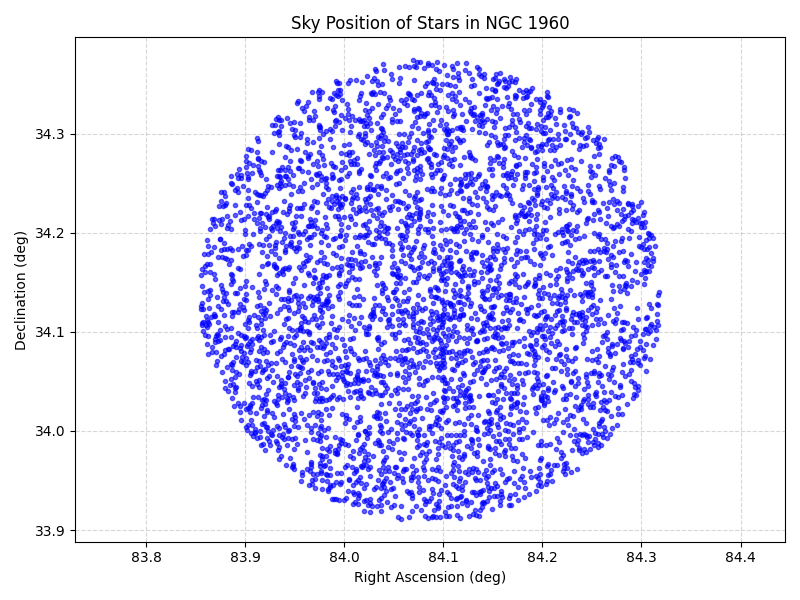

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(NGC_1960_data.RA_deg, NGC_1960_data.DEC_deg, 'bo', markersize=3, alpha=0.6)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.axis('equal')
plt.title('Sky Position of Stars in NGC 1960')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Above is the plot of complete data set from the paper

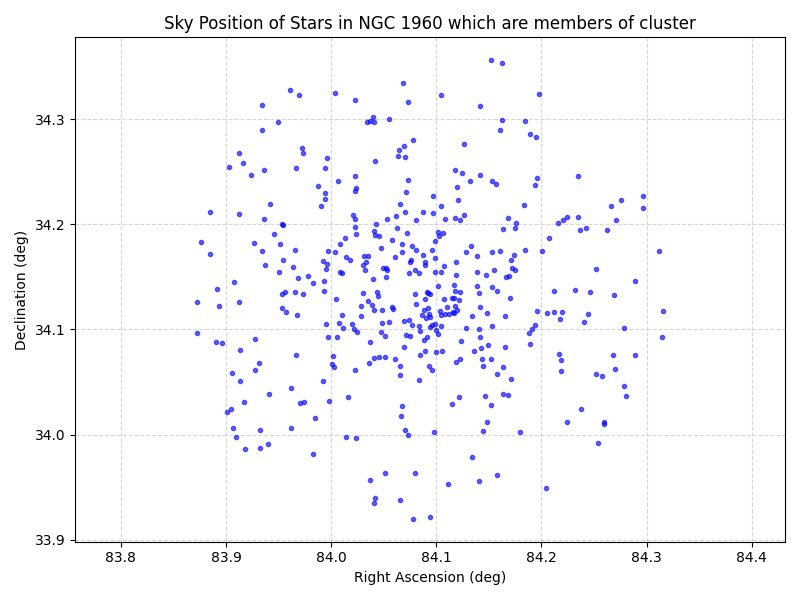

In [98]:
plt.figure(figsize=(8, 6))
plt.plot(Df_member.RA_deg, Df_member.DEC_deg, 'bo', markersize=3, alpha=0.6)
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.axis('equal')
plt.title('Sky Position of Stars in NGC 1960 which are members of cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The plot above gives the sky distribuion of cluster members which were filtered from visual inspection.

In [105]:
# Just estimating centre coordinates
print(np.mean(NGC_1960_data['RA_deg']))
print(np.mean(NGC_1960_data['DEC_deg']))

84.08463687321216
34.13780913119075


In [9]:
def angular_distance(ra1, dec1, ra2, dec2):
    """Compute angular distance (in degrees) using spherical law of cosines."""
    ra1_rad, dec1_rad = np.radians(ra1), np.radians(dec1)
    ra2_rad, dec2_rad = np.radians(ra2), np.radians(dec2)
    
    delta_ra = ra2_rad - ra1_rad
    return np.degrees(np.arccos(
        np.sin(dec1_rad) * np.sin(dec2_rad) + 
        np.cos(dec1_rad) * np.cos(dec2_rad) * np.cos(delta_ra)
    ))

# Step 1: Get center coordinates (mean or median)
RA_center = NGC_1960_data['RA_deg'].median()
DEC_center = NGC_1960_data['DEC_deg'].median()

# Step 2: Compute angular distances from center to each point
distances = angular_distance(
    RA_center, DEC_center,
    NGC_1960_data['RA_deg'], NGC_1960_data['DEC_deg']
)

# Step 3: Radius is max distance from center
radius_deg = distances.max()

print(f"Estimated center: RA = {RA_center:.4f} deg, DEC = {DEC_center:.4f} deg")
print(f"Estimated radius: {radius_deg:.4f} deg")

Estimated center: RA = 84.0876 deg, DEC = 34.1333 deg
Estimated radius: 0.2414 deg


# Gaia Data

In [11]:
from astropy.io.votable import parse_single_table

In [62]:
table = parse_single_table("Data/1747086419381O-result.vot")
data = table.to_table()  # Convert to Astropy Table

In [63]:
Df=data.to_pandas()
Df

,DESIGNATION,SOURCE_ID,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,...,ebpminrp_gspphot,target_id,target_ra,target_dec,target_parallax,target_pm_ra,target_pm_dec,target_radial_velocity,epoch,target_separation__deg_
0,Gaia DR3 3449518376949056768,3449518376949056768,84.083817,34.133559,0.512653,-1.346902,-3.519853,1.020129,19.445866,3.224810,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.001434
1,Gaia DR3 3449518308229644672,3449518308229644672,84.087481,34.135823,0.973470,2.859627,-6.294408,1.003043,12.102562,0.509492,...,0.3377,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.003001
2,Gaia DR3 3449518381245283968,3449518381245283968,84.079700,34.133210,0.827296,-0.260035,-3.453209,0.946427,13.821329,0.761356,...,0.4219,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.003977
3,Gaia DR3 3449518312526057344,3449518312526057344,84.088706,34.136149,NaN,NaN,NaN,NaN,20.243383,0.620623,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.004066
4,Gaia DR3 3449518312525807616,3449518312525807616,84.083180,34.129494,1.070621,-0.861757,-3.552284,1.162729,19.745195,2.063347,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.005533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,Gaia DR3 3449331498623241856,3449331498623241856,84.359195,34.055306,1.321775,0.047931,-2.783114,1.060707,20.415319,1.528469,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.241420
9316,Gaia DR3 3449539478122649984,3449539478122649984,84.027563,34.371872,1.372493,1.125310,-0.669955,0.952939,20.496389,2.098072,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.241436
9317,Gaia DR3 3449334659719115776,3449334659719115776,84.372472,34.171190,0.899048,-2.061334,-1.526200,1.017940,20.374121,1.659105,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.241453
9318,Gaia DR3 3449523019806181888,3449523019806181888,84.337567,34.254644,-1.022807,-0.988569,-1.519832,1.067869,20.355482,1.918938,...,NaN,NGC1960,84.084,34.135,0.835,-0.155,-3.388,7.03,2000,0.241468


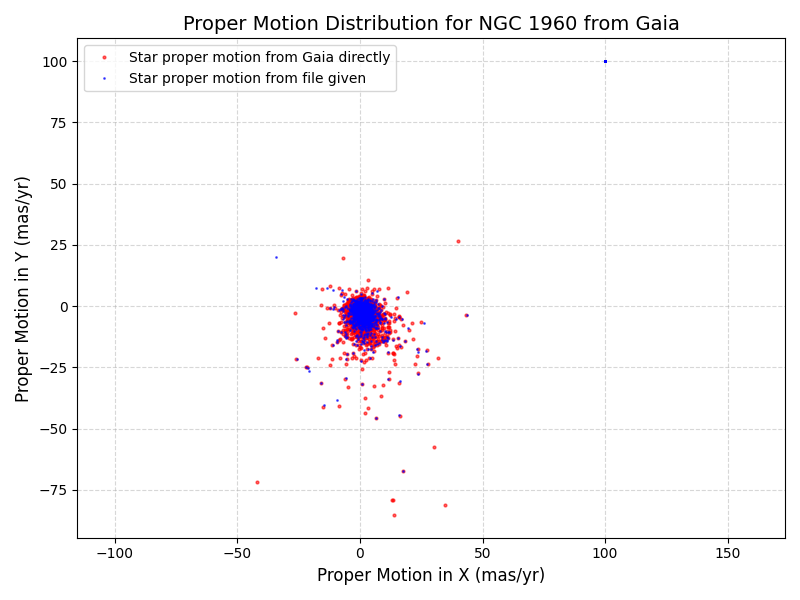

In [87]:
plt.figure(figsize=(8, 6))  # Optional: larger figure size
plt.plot(
    Df.pmra, 
    Df.pmdec, 
    'ro', 
    markersize=2,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion from Gaia directly'
)

plt.plot(
    NGC_1960_data.mu_x, 
    NGC_1960_data.mu_y, 
    'bo', 
    markersize=1,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion from file given'
)
plt.axis('equal')

# Add labels and title
plt.xlabel('Proper Motion in X (mas/yr)', fontsize=12)
plt.ylabel('Proper Motion in Y (mas/yr)', fontsize=12)
plt.title('Proper Motion Distribution for NGC 1960 from Gaia', fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
Df.radial_velocity.isna().sum()

9035

Note that out of 9320 sources only 285 have non nan value of radial velocity

In [106]:
Df2=Df[Df.radial_velocity.notna()] # filter GAIA-DR3 data based on non-nan value of radial velocity measurement

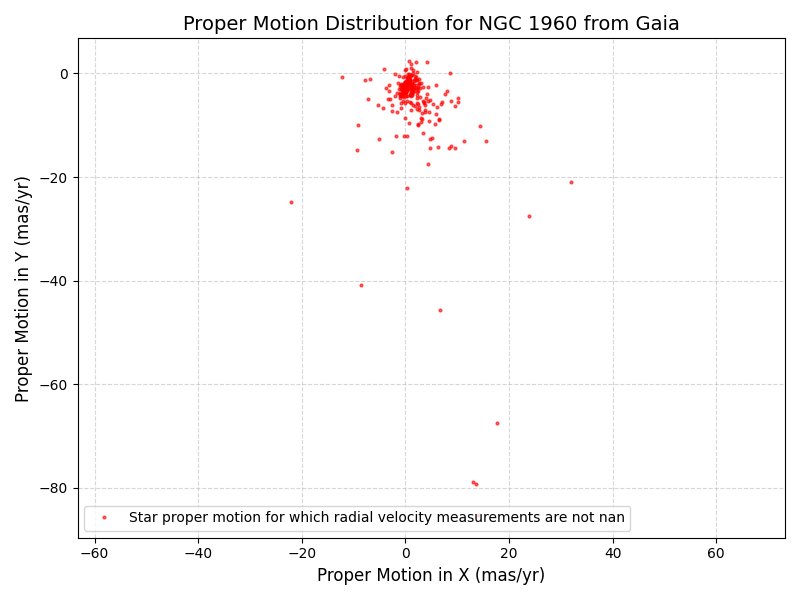

In [88]:
plt.figure(figsize=(8, 6))  # Optional: larger figure size
plt.plot(
    Df2.pmra, 
    Df2.pmdec, 
    'ro', 
    markersize=2,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion for which radial velocity measurements are not nan'
)
'''
plt.plot(
    NGC_1960_data.mu_x, 
    NGC_1960_data.mu_y, 
    'bo', 
    markersize=1,  # smaller marker size
    alpha=0.6,     # optional: make points slightly transparent
    label='Star proper motion from file given'
)
'''
# Add labels and title
plt.xlabel('Proper Motion in X (mas/yr)', fontsize=12)
plt.ylabel('Proper Motion in Y (mas/yr)', fontsize=12)
plt.title('Proper Motion Distribution for NGC 1960 from Gaia', fontsize=14)
plt.axis('equal')
# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

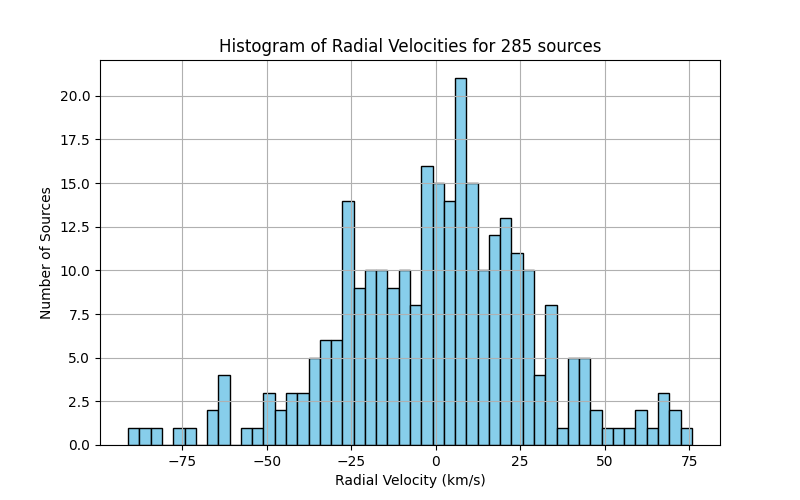

In [75]:
plt.figure(figsize=(8, 5))  # optional: set size (width, height)

# Your plotting code here
plt.hist(Df2.radial_velocity, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Radial Velocity (km/s)")
plt.ylabel("Number of Sources")
plt.title("Histogram of Radial Velocities for 285 sources")
plt.grid(True)
plt.show()

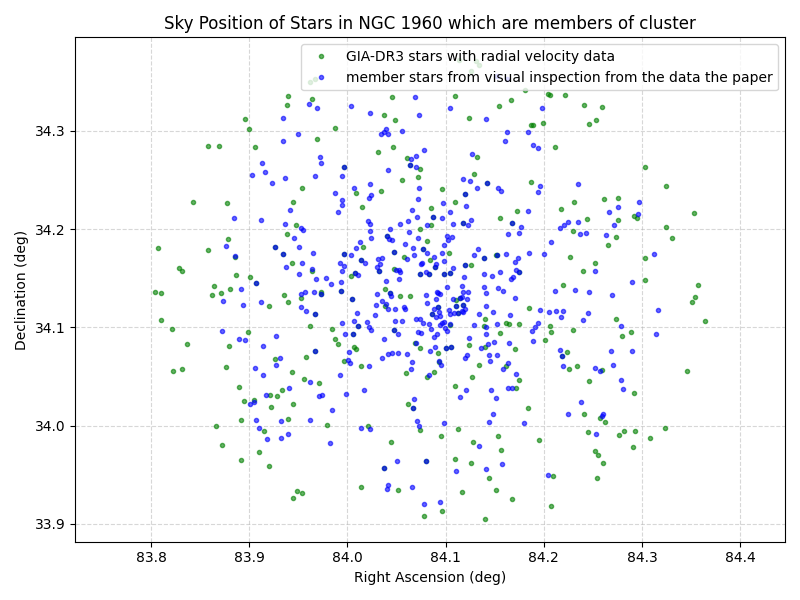

In [107]:
plt.figure(figsize=(8, 6))
plt.plot(Df2.ra, Df2.dec, 'go', markersize=3, alpha=0.6, label="GIA-DR3 stars with radial velocity data")


plt.plot(Df_member.RA_deg, Df_member.DEC_deg, 'bo', markersize=3, alpha=0.6, label="member stars from visual inspection from the data the paper")
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.axis('equal')
plt.title('Sky Position of Stars in NGC 1960 which are members of cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()